In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

#-- Pytorch specific libraries import -----#
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ticket-cancellation-prediction-final/sample_submission.csv
/kaggle/input/ticket-cancellation-prediction-final/train.csv
/kaggle/input/ticket-cancellation-prediction-final/test.csv


## Team birgerkings
- Yukta Rajapur IMT2021066
- Brij Desai IMT2021067
- Varshith Vattikuti IMT2021078

# Preprocessing and Data Cleaning

## Loading Data

In [89]:
train_df = pd.read_csv("/kaggle/input/ticket-cancellation-prediction-final/train.csv")
train_df

,ID,TimeOfCreation,TimeOfDeparture,BillNo.,TicketNo.,StatusofReserve,UserID,Gender-Male,Price,Discounts,...,DomesticFlight,TypeOfVehicle,VehicleClass,ReasonForTrip,ModeOfTravel,PassportNumberHashed,EmailHashed,BuyerMobile,NationalCode,Cancelled
0,100505,2022-07-06 06:02:12.407,2022-07-06 10:30:00,38131030,7359427.0,3,NaN,True,850000.0,0.0,...,1,اسکانیا کلاسیک ۳۲نفره,True,Int,Bus,NaN,51726016301ff645e88be828ae6277a23ea22fcab14880...,965396967731,103017017,0
1,100506,2022-09-11 13:51:08.797,2022-09-13 14:45:00,39115817,3002688.0,2,891421.0,True,5338000.0,0.0,...,1,5ستاره اكونومي سلامت فدك,NaN,Int,Train,NaN,e5a486781dac75d915322638102f2bafd512687be5d814...,452719996887,261570051,0
2,100507,2022-08-01 14:45:28.883,2022-08-24 20:39:00,38510118,2927990.0,4,NaN,False,1355000.0,0.0,...,1,3 ستاره 6 تخته کوير,NaN,Work,Train,NaN,NaN,116690640411,957707173,1
3,100508,2022-09-29 10:41:28.120,2022-09-29 20:30:00,39403118,7663791.0,3,264716.0,True,2540000.0,0.0,...,1,VIP 2+1 / یک وعده غذای گرم,True,Work,Bus,NaN,b565e2250ec788a19435ec680fd11c47f77f0c92587bf4...,642337257287,264441760,0
4,100509,2022-10-03 16:43:35.277,2022-10-04 12:15:00,39470084,7681449.0,3,76842.0,True,1690000.0,0.0,...,1,VIPمارال تخت شو با شارژر اختصاصی,True,Int,Bus,NaN,aa472b493e4499370b308a11358755bef6c4b04def69f2...,138128253547,765571492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,171211,2022-04-07 20:00:01.463,2022-04-08 23:00:00,36839872,7018030.0,5,NaN,True,1250000.0,0.0,...,1,VIP تخت شو با تغذیه و شارژر اختصاصی,True,Work,Bus,NaN,NaN,331267793363,786340025,1
70707,171212,2022-06-09 07:48:10.583,2022-06-09 16:50:00,37704940,2825554.0,2,NaN,True,3490000.0,0.0,...,1,4ستاره 4تخته غزال,NaN,Work,Train,NaN,5f8a8f968e1acf15fd5c1bc6972c43af532825df83bbce...,409302394890,223381594,0
70708,171213,2022-08-13 07:19:38.040,2022-08-14 23:15:00,38660767,7510813.0,3,NaN,True,1725000.0,0.0,...,1,VIPمانیتوردار,True,Work,Bus,NaN,a3a16f687108ba4854855f3788efc31c8b368fbfb68994...,666188659988,1940457,0
70709,171214,2022-05-02 12:38:36.460,2022-05-03 19:00:00,37152781,7096569.0,3,NaN,False,3200000.0,0.0,...,1,VIPمانیتوردار,True,Int,Bus,NaN,NaN,832973699414,194725973,0


## Identifying number of null values in columns

In [90]:
train_df.info()
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages.sort_values(ascending=False)
columns_to_drop = ['UserID', 'PassportNumberHashed', 'EmailHashed', 'VehicleClass']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    70711 non-null  int64  
 1   TimeOfCreation        70711 non-null  object 
 2   TimeOfDeparture       70711 non-null  object 
 3   BillNo.               70711 non-null  int64  
 4   TicketNo.             70711 non-null  float64
 5   StatusofReserve       70711 non-null  int64  
 6   UserID                29680 non-null  float64
 7   Gender-Male           70711 non-null  bool   
 8   Price                 70711 non-null  float64
 9   Discounts             70711 non-null  float64
 10  CityFrom              70711 non-null  object 
 11  CityTo                70711 non-null  object 
 12  DomesticFlight        70711 non-null  int64  
 13  TypeOfVehicle         65422 non-null  object 
 14  VehicleClass          43826 non-null  object 
 15  ReasonForTrip      

## Observing unique values in each column

In [91]:
train_df.nunique().sort_values(ascending=False)

ID                      70711
TicketNo.               70668
BillNo.                 54448
TimeOfCreation          54448
NationalCode            51001
BuyerMobile             35773
TimeOfDeparture         26891
EmailHashed             13826
UserID                  12773
Price                    3735
TypeOfVehicle            2844
Discounts                1624
PassportNumberHashed      543
CityTo                    287
CityFrom                  219
ModeOfTravel                4
StatusofReserve             4
VehicleClass                2
ReasonForTrip               2
DomesticFlight              2
Gender-Male                 2
Cancelled                   2
dtype: int64

# EDA

## Percentage cancellations

In [92]:
is_can = len(train_df[train_df['Cancelled']==1])
print("Percentage cancelation= ", is_can/len(train_df))
print(train_df['StatusofReserve'].value_counts(normalize=True)*100)

Percentage cancelation=  0.15204140798461344
StatusofReserve
3    42.095289
2    30.911739
5    19.883752
4     7.109219
Name: proportion, dtype: float64


## Correlation Heatmap

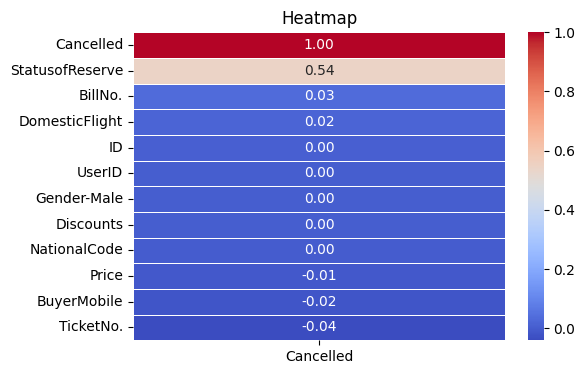

In [93]:
cancelled_correlation = train_df.corr(numeric_only=True)["Cancelled"].sort_values(ascending = False)

# Create a heatmap for the "Cancelled" column
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(cancelled_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Heatmap")
plt.show()

## Identifying columns with low correlation

In [94]:
columns_to_drop.extend(['ID', 'NationalCode', 'EmailHashed', 'UserID', 'Gender-Male', 'Discounts', 'TypeOfVehicle', 'CityTo', 'CityFrom'])
train_df = train_df.drop(columns_to_drop, axis=1)
train_df.shape

(70711, 11)

## Histplot of price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

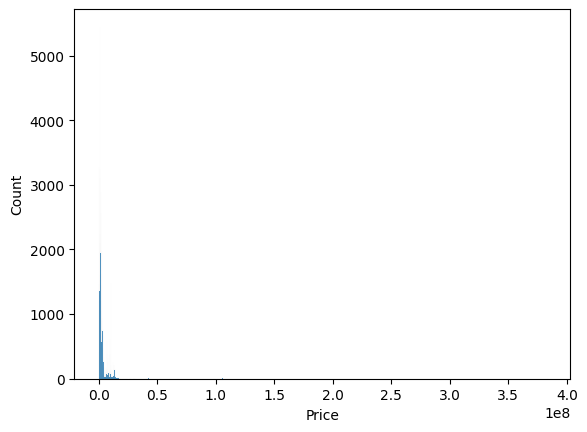

In [95]:
sns.histplot(train_df['Price'])

## Analysis on Status of Reserve

In [96]:
train_df["StatusofReserve"].value_counts()

StatusofReserve
3    29766
2    21858
5    14060
4     5027
Name: count, dtype: int64

<Axes: xlabel='StatusofReserve', ylabel='Cancelled'>

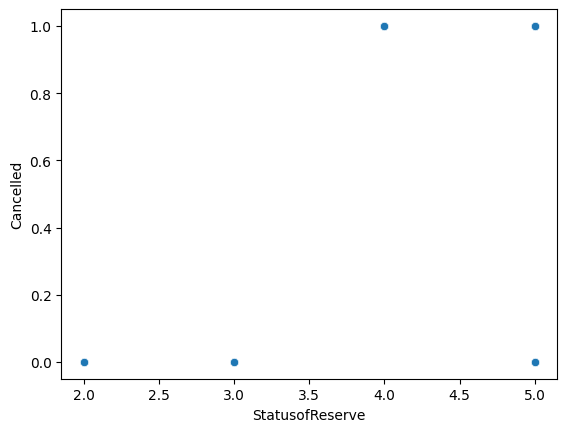

In [97]:
sns.scatterplot(x=train_df["StatusofReserve"], y=train_df["Cancelled"])

<Axes: xlabel='StatusofReserve', ylabel='count'>

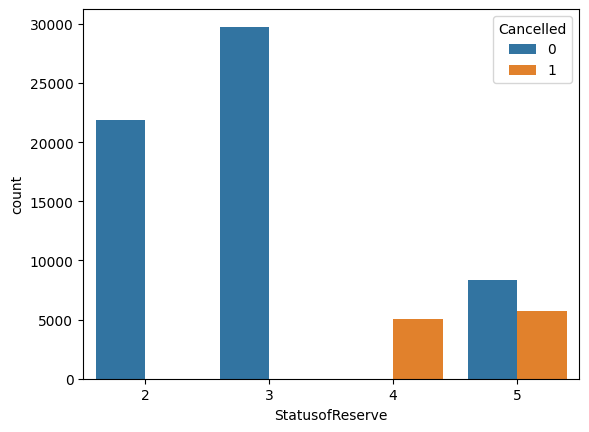

In [98]:
sns.countplot(data=train_df, x='StatusofReserve', hue='Cancelled')

# Feature Engineering

## Converting timestamp to datetime

In [99]:
train_df['TimeOfCreation'] = (pd.to_datetime(train_df['TimeOfCreation']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
train_df['TimeOfDeparture'] = (pd.to_datetime(train_df['TimeOfDeparture']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

## Adding a timestamp difference column

In [100]:
train_df['timestamp_diff_seconds'] = (train_df['TimeOfDeparture'] - train_df['TimeOfCreation'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TimeOfCreation          70711 non-null  int64  
 1   TimeOfDeparture         70711 non-null  int64  
 2   BillNo.                 70711 non-null  int64  
 3   TicketNo.               70711 non-null  float64
 4   StatusofReserve         70711 non-null  int64  
 5   Price                   70711 non-null  float64
 6   DomesticFlight          70711 non-null  int64  
 7   ReasonForTrip           70711 non-null  object 
 8   ModeOfTravel            70711 non-null  object 
 9   BuyerMobile             70711 non-null  int64  
 10  Cancelled               70711 non-null  int64  
 11  timestamp_diff_seconds  70711 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 6.5+ MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp_diff_seconds', ylabel='Count'>

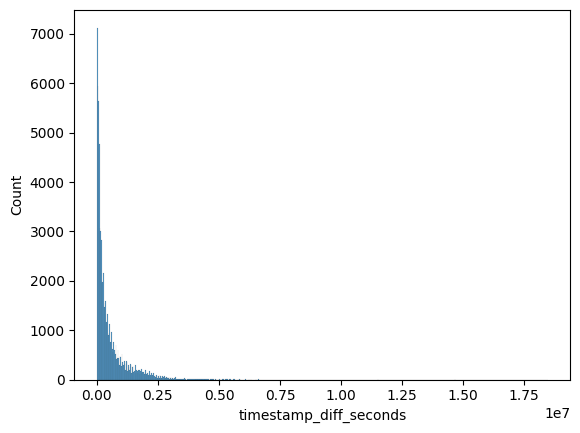

In [101]:
sns.histplot(train_df['timestamp_diff_seconds'])

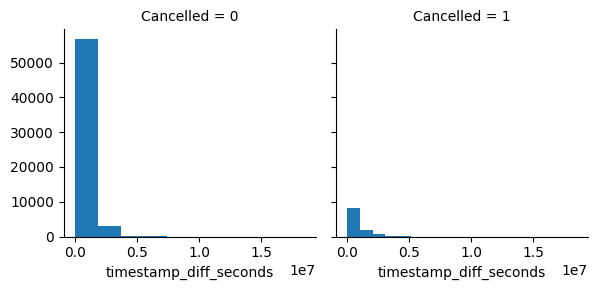

In [102]:
grid = sns.FacetGrid(train_df, col='Cancelled')
grid.map(plt.hist, 'timestamp_diff_seconds')
grid.add_legend()

## Label Encoding

In [103]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [ 'ReasonForTrip', 'ModeOfTravel']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70711 entries, 0 to 70710
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TimeOfCreation          70711 non-null  int64  
 1   TimeOfDeparture         70711 non-null  int64  
 2   BillNo.                 70711 non-null  int64  
 3   TicketNo.               70711 non-null  float64
 4   StatusofReserve         70711 non-null  int64  
 5   Price                   70711 non-null  float64
 6   DomesticFlight          70711 non-null  int64  
 7   ReasonForTrip           70711 non-null  int64  
 8   ModeOfTravel            70711 non-null  int64  
 9   BuyerMobile             70711 non-null  int64  
 10  Cancelled               70711 non-null  int64  
 11  timestamp_diff_seconds  70711 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.5 MB


In [104]:
train_df

,TimeOfCreation,TimeOfDeparture,BillNo.,TicketNo.,StatusofReserve,Price,DomesticFlight,ReasonForTrip,ModeOfTravel,BuyerMobile,Cancelled,timestamp_diff_seconds
0,1657087332,1657103400,38131030,7359427.0,3,850000.0,1,0,0,965396967731,0,16068
1,1662904268,1663080300,39115817,3002688.0,2,5338000.0,1,0,3,452719996887,0,176032
2,1659365128,1661373540,38510118,2927990.0,4,1355000.0,1,1,3,116690640411,1,2008412
3,1664448088,1664483400,39403118,7663791.0,3,2540000.0,1,1,0,642337257287,0,35312
4,1664815415,1664885700,39470084,7681449.0,3,1690000.0,1,0,0,138128253547,0,70285
...,...,...,...,...,...,...,...,...,...,...,...,...
70706,1649361601,1649458800,36839872,7018030.0,5,1250000.0,1,1,0,331267793363,1,97199
70707,1654760890,1654793400,37704940,2825554.0,2,3490000.0,1,1,3,409302394890,0,32510
70708,1660375178,1660518900,38660767,7510813.0,3,1725000.0,1,1,0,666188659988,0,143722
70709,1651495116,1651604400,37152781,7096569.0,3,3200000.0,1,0,0,832973699414,0,109284


# Balancing and Standardisation

In [105]:
train_df['Cancelled'].value_counts()/(len(train_df))

Cancelled
0    0.847959
1    0.152041
Name: count, dtype: float64

We can see that percentage of observations of the class label 0 and 1 is 84.7% and 15.2%. So, this is a class imbalanced problem.

## Train-Test-Split

In [106]:
y = train_df['Cancelled']
X = train_df.drop(['Cancelled'], axis=1)

In [107]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)
train_x.shape

(53033, 11)

## ADASYN (Adaptive Synthetic Algorithm) to balance the dataset

In [108]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import ADASYN
# sm = ADASYN(random_state=2)

# x_train_sm, y_train_sm = sm.fit_resample(train_x, train_y)

We tried SMOTE too, it gave very similar results

In [109]:
# len(y_train_sm[y_train_sm==0]),len(y_train_sm[y_train_sm==1])

## Standardization

In [110]:
scaler = StandardScaler()
x_train = scaler.fit_transform(train_x.values)
x_test =  scaler.fit_transform(test_x.values)

## Convert the Train and Test sets into Tensors

In [111]:
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(train_y.values.ravel()).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(test_y.values.ravel()).float()

## DataLoader to pass the data in batches to the model

In [112]:
#Define a batch size , 
bs = 128
#Both x_train and y_train can be combined in a single TensorDataset, which will be easier to iterate over and slice
y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(x_tensor, y_tensor)
#Pytorch’s DataLoader is responsible for managing batches. 
#You can create a DataLoader from any Dataset. DataLoader makes it easier to iterate over batches
train_dl = DataLoader(train_ds, batch_size=bs)


#For the validation/test dataset
ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=32)

## MLP (Model)
Define the Layers , Activation function , Number of nodes for the MultiLayerPerceptron

### Structure of MLP

* 2 Hidden Layers
* Normalizing the batch data usign batchnorm in between each layer
* Using ReLU Activation function between the layers
* Using dropout before sending to output
* Sigmoid at the output layer to make probabilities between 0 to 1

In [113]:
n_input_dim = train_x.shape[1]

#Layer size
n_hidden1 = 10  # Number of hidden nodes
n_hidden2 = 10
#n_hidden3 = 15
n_output =  1   # Number of output nodes = for binary classifier


class ChurnModel(nn.Module):
    def __init__(self):
        super(ChurnModel, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1) 
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        #self.layer_3 = nn.Linear(n_hidden2, n_hidden3)
        self.layer_out = nn.Linear(n_hidden2, n_output) 
        
        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)
        #self.batchnorm3 = nn.BatchNorm1d(n_hidden3)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
#         x = self.relu(self.layer_3(x))
#         x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))
        
        return x
    

model = ChurnModel()
print(model)

ChurnModel(
  (layer_1): Linear(in_features=11, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### Defining parameters (pretty much standard setting for Binary class problem)
* Loss computation function : Here using Binary Cross Entropy (BCE) which is defacto for Binary class problems
* Learning rate : Setting as 0.001 (can be optimized further)
* Optimizer : Adam
* Epochs of Training : setting as 50

In [114]:
#Loss Computation
loss_func = nn.BCELoss()
#Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 150

## Training the MLP Model
NN Steps flow

* Forward Propagation
* Loss computation
* Backpropagation
* Updating the parameters

In [115]:
model.train()
train_loss = []
for epoch in range(epochs):
    #Within each epoch run the subsets of data = batch sizes.
    for xb, yb in train_dl:
        y_pred = model(xb)            # Forward Propagation
        loss = loss_func(y_pred, yb)  # Loss Computation
        optimizer.zero_grad()         # Clearing all previous gradients, setting to zero 
        loss.backward()               # Back Propagation
        optimizer.step()              # Updating the parameters 
    #print("Loss in iteration :"+str(epoch)+" is: "+str(loss.item()))
    train_loss.append(loss.item())
print('Last iteration loss value: '+str(loss.item()))

Last iteration loss value: 0.08666595816612244


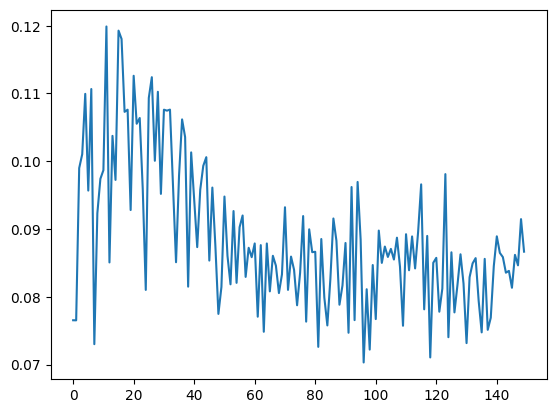

In [116]:
plt.plot(train_loss)
plt.show()

loss stabilizing after approximately 60 epochs

### Test Dataset prediction on trained NN

In [117]:
import itertools

y_pred_list = []
model.eval()
#Since we don't need model to back propagate the gradients in test set we use torch.no_grad()
# reduces memory usage and speeds up computation
with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = model(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

#Takes arrays and makes them list of list for each batch        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#flattens the lists in sequence
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

## Confusion Matrix and Results

In [118]:
y_true_test = test_y.values.ravel()
conf_matrix = confusion_matrix(y_true_test ,ytest_pred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_true_test,ytest_pred)))
print("Recall of the MLP    :\t"+str(recall_score(y_true_test,ytest_pred)))
print("F1 Score of the Model :\t"+str(f1_score(y_true_test,ytest_pred)))

Confusion Matrix of the Test Set
-----------
[[14963     1]
 [  304  2410]]
Precision of the MLP :	0.9995852343425964
Recall of the MLP    :	0.887988209285188
F1 Score of the Model :	0.9404878048780487


# Prediction on New data

In [119]:
test = pd.read_csv('/kaggle/input/ticket-cancellation-prediction-final/test.csv')
id=test['ID']
id

0        171216
1        171217
2        171218
3        171219
4        171220
          ...  
30301    201517
30302    201518
30303    201519
30304    201520
30305    201521
Name: ID, Length: 30306, dtype: int64

In [120]:
test_df = test.drop(columns_to_drop, axis=1)
for column in columns_to_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column])
test_df['TimeOfCreation'] = (pd.to_datetime(test_df['TimeOfCreation']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
test_df['TimeOfDeparture'] = (pd.to_datetime(test_df['TimeOfDeparture']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
test_df['timestamp_diff_seconds'] = (test_df['TimeOfDeparture'] - test_df['TimeOfCreation'])

In [121]:
scaler = StandardScaler()
test_df = scaler.fit_transform(test_df)

xtensor =  torch.from_numpy(test_df).float()
loader = DataLoader(xtensor, batch_size=32)
y_pred_list = []
model.eval()
#Since we don't need model to back propagate the gradients in test set we use torch.no_grad()
# reduces memory usage and speeds up computation
with torch.no_grad():
    for xb_test in loader:
        y_test_pred = model(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

#Takes arrays and makes them list of list for each batch        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#flattens the lists in sequence
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

In [122]:
dictionary={
    'ID':test['ID'],
    'Cancelled':ytest_pred
}
df2 = pd.DataFrame(dictionary)
df2.to_csv('nn.csv', index=False)